# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [43]:
# Import the appropriate libraries with aliases
import pandas as pd

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [47]:
#Code Used:
north_df.head()
countN = north_df['Rep ID'].drop_duplicates().size
print(countN)

9


#### EDA Question 1B:  How many reps are in the South branch?  

In [37]:
#Code Used:
south_df.head()
countS = south_df['Rep ID'].drop_duplicates().size
print(countS)

11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [45]:
#Code Used:
north_df.head()
avg1 = round(north_df['Busy Minutes'].mean(),2)
avg2 = round(north_df['Not Ready Minutes'].mean(),2)
avg3 = round(north_df['Incoming Wait Time'].mean(),2)
avg4 = round(north_df['During Call Wait Time'].mean(),2)
print(avg1,avg2,avg3,avg4)

9.99 1.91 3.05 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [46]:
#Code Used:
avg5 = round(south_df['Busy Minutes'].mean(),2)
avg6 = round(south_df['Not Ready Minutes'].mean(),2)
avg7 = round(south_df['Incoming Wait Time'].mean(),2)
avg8 = round(south_df['During Call Wait Time'].mean(),2)
print(avg5,avg6,avg7,avg8)

10.05 1.91 3.0 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [48]:
# Code Used:
# Number of calls taken for both branches per each time block
c_df = (north_df.groupby(["Time Block"]).Calls.sum() + south_df.groupby(["Time Block"]).Calls.sum()).reset_index()
display(c_df)
#s_df = south_df.groupby(["Time Block"]).Calls.sum().reset_index()
#display(s_df)

,Time Block,Calls
0,10:00 AM,99
1,11:00 AM,56
2,12:00 PM,120
3,1:00 PM,40
4,2:00 PM,65
5,3:00 PM,73
6,4:00 PM,53
7,5:00 PM,43
8,9:00 AM,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 


#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Missing values for Incoming wait time  for both branches. North and South branch have about 67% and 60% of records missing, respectively. They are the records of amount of time after the assigned rep is available to take the call wwhen the customer waits for a representative to pick up the call.

Action: All the missing data for Outgoing calls can be updated with "0" as not applicable.


In [4]:
# Code Used
import pandas as pd
import numpy as np
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
for col in north_df.columns:
   missing_percentage = np.mean(north_df[col].isnull())
   print('{} - {}%'.format(col, round(missing_percentage*100)))
print("\n")    
for col in south_df.columns:
   missing_percentage = np.mean(south_df[col].isnull())
   print('{} - {}%'.format(col, round(missing_percentage*100)))  

#Update Null Values with NA
north_df["Incoming Wait Time"] = north_df["Incoming Wait Time"].fillna(0)
north_df.info()

south_df["Incoming Wait Time"] = south_df["Incoming Wait Time"].fillna(0)
south_df.info()    
# Add Additional Cells as needed.


Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue         

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 
##(1) By using the unique method for the column "Sale', I found a trailing space in the value of one variable from the output: array(['NO', 'YES ', 'YES'], dtype=object). 
##(2) To remove the trailing space, the rstrip() method is used for the string.
array(['NO', 'YES'], dtype=object)
Key: Looks like the sale field was updated for an abandoned call. This might be a mistyped entry in the sales field as Abandoned calls are ended by Users if they are waiting for a long time for a response and assumption is that the sales may not happen for abandoned calls. I will be dropping these 2 records as I dont have a way to validate this information at this time.


In [5]:
#Code Used
import pandas as pd

#north_df['Sale'].unique() # Initial check on distinct data values
#north_df['Sale'] = north_df['Sale'].str.rstrip()
#north_df['Sale'].unique() #  Validate only 'YES' and 'NO' existing in the column after space cleanup

# Drop row using index value
north_df = north_df.drop(86)
north_df = north_df.drop(87)

north_df.info()

# Add Additional Cells aorths needed.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             243 non-null    int64  
 1   Branch                 243 non-null    object 
 2   Call Purpose           243 non-null    object 
 3   Time Block             243 non-null    object 
 4   Incoming or Outgoing   243 non-null    object 
 5   Queue                  243 non-null    object 
 6   Rep ID                 243 non-null    object 
 7   Sale                   243 non-null    object 
 8   Lost Call              243 non-null    int64  
 9   Abandoned              243 non-null    int64  
 10  Busy Minutes           243 non-null    int64  
 11  Not Ready Minutes      243 non-null    int64  
 12  Incoming Wait Time     243 non-null    float64
 13  During Call Wait Time  243 non-null    int64  
 14  Calls                  243 non-null    int64  
dtypes: flo

In [7]:
#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: With the use of method named drop_duplicates, the dataframe will be left with unique rows.

SyntaxError: invalid syntax (<ipython-input-7-ae450db51b17>, line 3)

In [11]:
#Code Used
north_df = north_df.drop_duplicates()
north_df.info()
south_df = south_df.drop_duplicates()
south_df.info()
# Add Additional Cells as needed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 244
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             243 non-null    int64  
 1   Branch                 243 non-null    object 
 2   Call Purpose           243 non-null    object 
 3   Time Block             243 non-null    object 
 4   Incoming or Outgoing   243 non-null    object 
 5   Rep ID                 243 non-null    object 
 6   Sale                   243 non-null    object 
 7   Lost Call              243 non-null    int64  
 8   Abandoned              243 non-null    int64  
 9   Busy Minutes           243 non-null    int64  
 10  Not Ready Minutes      243 non-null    int64  
 11  Incoming Wait Time     243 non-null    float64
 12  During Call Wait Time  243 non-null    int64  
 13  Calls                  243 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 28.5+ KB


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: No unnecessary data exists in the two data sets, and if so, the column can be dropped using drop('column', axis=1, inplace=True).

north_df.drop('Queue', axis=1, inplace=True)
Output:
Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Rep ID', 'Sale', 'Lost Call', 'Abandoned',
       'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')
south_df.drop('Queue', axis=1, inplace=True)
Output:
Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Rep ID', 'Sale', 'Lost Call', 'Abandoned',
       'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],Abandoned
      dtype='object') 

<AxesSubplot:>

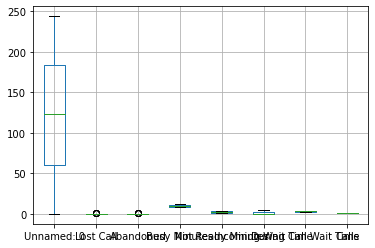

In [44]:
#Code Used
# Box Plot to check any outliers
north_df.boxplot()  # No outliners are found

# Add Additional Cells as needed.


<AxesSubplot:>

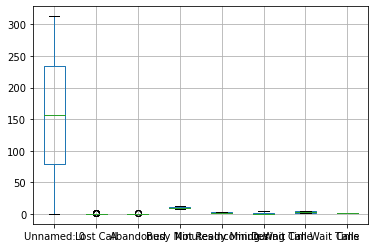

In [43]:
south_df.boxplot()   # No outliners are found

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [6]:
# Create dataframe for the entire company named df
df = north_df.append(south_df)
df.shape

(557, 15)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent - 37
- South Branch = Eric  - 35


In [14]:
# Code Used
df.groupby(['Rep ID','Branch'])[['Calls']].sum().sort_values(["Calls"], ascending=False)

# Add Additional Cells as needed.

,,Calls
Rep ID,Branch,
Brent,North,37
Eric,South,35
Randy,South,33
Sandy,South,32
Helga,South,31
Lilly,North,30
Todd,North,29
Duke,North,29
George,South,29


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of thes. fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.0%
- South Branch = 1.0%
- Company Wide = 2.0%
- Do any of these fall out of the optimal range of 2-5%? No. South Branch even has 1% of average call abandonment rate, which is better than the optimal range. 

In [7]:
# Code Used
# Calculate the average Abandoned rate for North Branch and South Branch 
print(round(df.groupby(["Branch"])["Abandoned"].mean(),2) * 100)

# Calculate the average Abandoned rate for the whole company
print("Company Wide: ", round(df["Abandoned"].mean(),2) * 100)
      
# Add Additional Cells as needed.

Branch
North    2.0
South    1.0
Name: Abandoned, dtype: float64
Company Wide:  2.0


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40, 33
- South Branch = 38, 48
- Company Wide = 39, 81

In [8]:
# Code Used
import seaborn as sns
import matplotlib.pyplot as plt

north_df['Sale'] = north_df['Sale'].str.rstrip()
north_df['Sale'].unique()

df = north_df.append(south_df) # In future version, use pandas.concat instead as the frame.append method is deprecated and will be removed from pandas.

# Incoming calls answered within 2 seconds for the North Branch
north_df_waittime = north_df[north_df['Incoming Wait Time'] <= 2.0]  
north_df_waittime = north_df_waittime[north_df_waittime['Incoming or Outgoing'] == 'Incoming']
north_df_total_incoming = north_df[north_df['Incoming or Outgoing'] == 'Incoming'] 

# Incoming calls answered within 2 seconds for the South Branch
south_df_waittime = south_df[south_df['Incoming Wait Time'] <= 2.0] 
south_df_waittime = south_df_waittime[south_df_waittime['Incoming or Outgoing'] == 'Incoming']
south_df_total_incoming = south_df[south_df['Incoming or Outgoing'] == 'Incoming']

# Incoming calls answered within 2 seconds for the entire company
df_waittime = df[df['Incoming Wait Time'] <= 2.0] 
df_waittime = df_waittime[df_waittime['Incoming or Outgoing'] == 'Incoming']
df_total_incoming = df[df['Incoming or Outgoing'] == 'Incoming'] 

# Calculate the percentage of calls answered within 2 seconds
#np = round(n2_df_waittime.count() / n2_df_total_incoming.count(), 2)

print("North Branch Service Level:")
print("Percentage of calls answered within 2 seconds: ", round(north_df_waittime["Incoming Wait Time"].count() / north_df_total_incoming["Incoming Wait Time"].count() * 100))
print("No of calls answered within 2 seconds: ", round(north_df_waittime["Incoming Wait Time"].count()))

print("\nSouth Branch Service Level:")
print("Percentage of calls answered within 2 seconds: ", round(south_df_waittime["Incoming Wait Time"].count() / south_df_total_incoming["Incoming Wait Time"].count() * 100))
print("No of calls answered within 2 seconds: ", round(south_df_waittime["Incoming Wait Time"].count()))

print("\nCompany Wide Service Level:")
print("Percentage of calls answered within 2 seconds: ", round(df_waittime["Incoming Wait Time"].count() / df_total_incoming["Incoming Wait Time"].count() * 100))
print("No of calls answered within 2 seconds:", round(df_waittime["Incoming Wait Time"].count()))

# Add Additional Cells as needed.
    

North Branch Service Level:
Percentage of calls answered within 2 seconds:  40
No of calls answered within 2 seconds:  33

South Branch Service Level:
Percentage of calls answered within 2 seconds:  38
No of calls answered within 2 seconds:  48

Company Wide Service Level:
Percentage of calls answered within 2 seconds:  39
No of calls answered within 2 seconds: 81


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [36]:
# Code Used 
# To get the average speed using groupby and mean function
print("Branch wise average speed of answer:\n",  round(df_total_incoming.groupby(["Branch"])["Incoming Wait Time"].mean(), 2))
print("Company wide average speed of answer:", round(df_total_incoming["Incoming Wait Time"].mean(), 2))

Branch wise average speed of answer:
 Branch
North    3.05
South    3.00
Name: Incoming Wait Time, dtype: float64
Company wide average speed of answer: 3.02


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: A line chart shows the trend and the changes of abandonment rate for different queues over the period of time, which allows an easy comparison of the performance among different queues. 


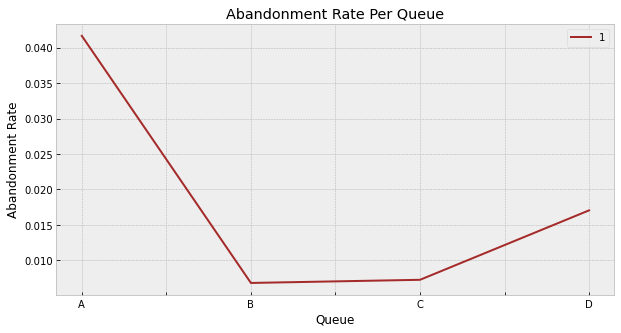

In [16]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from matplotlib import style

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
# Create dataframe
abandonment_rates_df = pd.DataFrame(abandonment_rates.items(), index = queues)

# Set the graph style and template
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (10,5)

# Create Line Chart
abandonment_rates_df.plot(kind = 'line', color = 'brown')
plt.title('Abandonment Rate Per Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')
plt.xticks(color ='black')
plt.yticks(color ='black')
plt.savefig('linechart_single.png')
plt.show()



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: Using a Horizontal Chart can provide a clear view of individual Reps' performance and related comparison. With that said, line chart and Vertical Bar Chart can also share the similiar purposes and effectiveness, and that's why the Vertical Bar Chart is used to present the service level percentage.


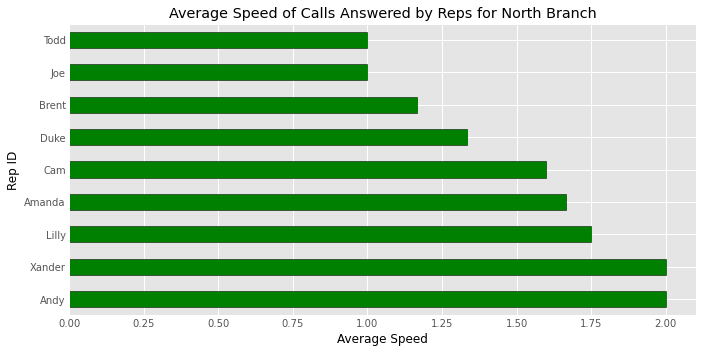

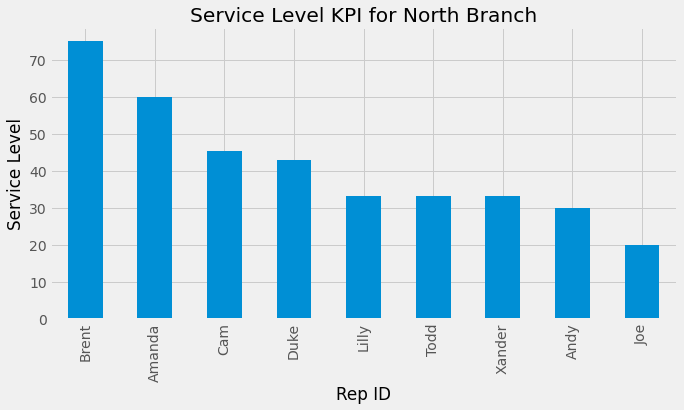

In [36]:
# Create visualization 2 here

# north_plt contains the data you need for the average speed of answer of each rep
north_plt = north_df_waittime.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep ID
quick_calls = north_df_waittime[north_df_waittime["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum() # Final Table

# Table 2: Total Incoming Calls grouped by Rep ID
total_calls_in = north_df_total_incoming[north_df_total_incoming["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on = "Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# Your Code Here:

# Average speed of Answer KPI Chart - Horizontal Bar Chart

# Set Index
north_plt = north_plt.set_index("Rep ID")

# Sort for better view of performance per Rep ID in descending order
north_plt = north_plt.sort_values(["Incoming Wait Time"], ascending = False)

# Create Horizontal Bar Chart
plt.style.use("ggplot")
north_plt.plot.barh(legend = False, color = 'green', edgecolor = 'black')
plt.title('Average Speed of Calls Answered by Reps for North Branch', color = 'black')
plt.xlabel('Average Speed', color = 'black')
plt.ylabel('Rep ID', color = 'black')
#plt.xticks(color = 'black')
#plt.yticks(color = 'black')
plt.savefig('bar_horizontal.png')
plt.show()

# Service Level KPI - Vertical Bar Chart
service_level_kpi = service_level.drop(["Calls_x" , "Calls_y"], axis = 1)
service_level_kpi = service_level_kpi.sort_values(["Service Level %"], ascending = False)

# Create Vertical Bar Chart
plt.style.use("fivethirtyeight")
service_level_kpi.plot(kind = 'bar', legend = False)
plt.title('Service Level KPI for North Branch', color = 'black')
#plt.xticks(color = 'black')
#plt.yticks(color = 'black')
plt.ylabel('Service Level', color = 'black')
plt.xlabel('Rep ID', color = 'black')
plt.savefig('bar_vertical.png')
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
The grouped bar chart can present a clear view of incoming and outgoing calls over different types of call purpose.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                121
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


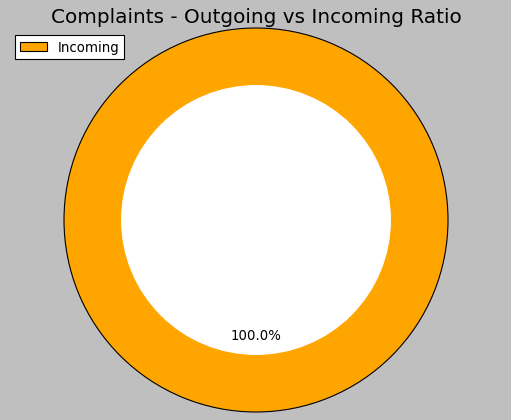

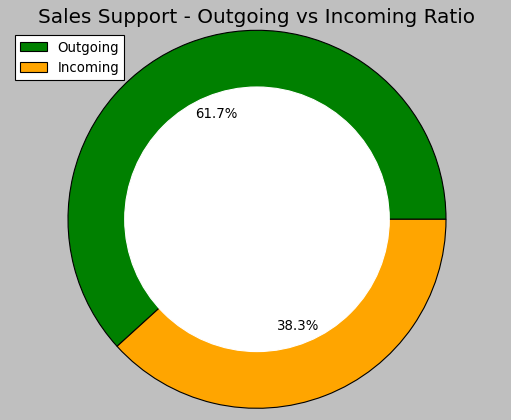

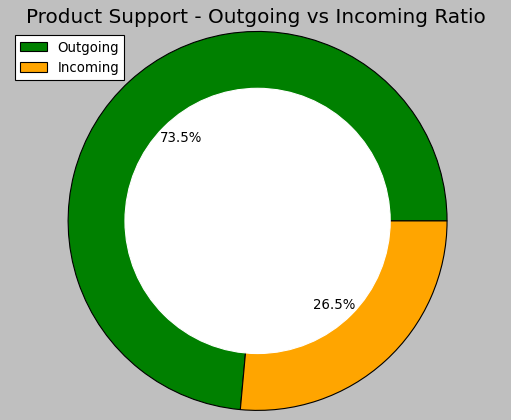

In [80]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Sales Support", "Product Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# Your Code Here:
# Create DataFrame from dictonary for Complaints
complaints_df = pd.DataFrame(complaints.items(), index = ["Incoming"])
complaints_df.rename(columns = {0:'Type', 1:'Total'}, inplace = True)
complaints_df = complaints_df.drop(["Type"], axis = 1)

# Donut Chart Parameters
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['orange']
plt.pie(complaints_df["Total"], autopct = '%1.1f%%', shadow = False, explode = [0], colors = colors, startangle = 90)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(complaints_df.index, fontsize = 12, loc = 'upper left')
plt.title('Complaints - Outgoing vs Incoming Ratio', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut.png')
plt.show()

# Create DataFrame from dictonary for Sales Support
sales_support_df = pd.DataFrame(sales_support.items(), index = ["Outgoing" , "Incoming"])
sales_support_df.rename(columns = {0:'Type', 1:'Total'}, inplace = True)
sales_support_df = sales_support_df.drop(["Type"], axis = 1)

# Donut Chart Parameters
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['green','orange']
plt.pie(sales_support_df["Total"], autopct = '%1.1f%%', shadow = False, explode = [0,0], colors = colors, startangle = 0)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(sales_support_df.index, fontsize = 12, loc = 'upper left')
plt.title('Sales Support - Outgoing vs Incoming Ratio', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut.png')
plt.show()

#Creating DF from dictonary for Product Support
product_support_df = pd.DataFrame(product_support.items(), index = ["Outgoing" , "Incoming"])
product_support_df.rename(columns = {0:'Type', 1:'Total'}, inplace = True)
product_support_df = product_support_df.drop(["Type"], axis = 1)

# Donut Chart Parameters
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['green', 'orange']
plt.pie(product_support_df["Total"], autopct = '%1.1f%%', shadow = False, explode = [0,0], colors = colors, startangle = 0)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(product_support_df.index, fontsize = 12, loc = 'upper left')
plt.title('Product Support - Outgoing vs Incoming Ratio', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut.png')

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: Based on the KPIs calculated above, the South Branch has been operating more efficiently with a better performance than the North Branch. With the average abandonment rate of 1% (2-5% as optimal range) and at the service level percentage of 38% (40% for North Branch), the South Branch has a higher amount of calls answered than the North Branch and the average speed of calls answered is 3.0 seconds.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
According to the KPIs presented previously, the North Branch would benefit from the extra help to improve their overall performance such as the abandonment rate of incoming calls and the speed of calls answered.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
The information collected from the datasets seems to be helpful when calculating the current KPIs. For further analysis over the customer service and/or product support or market sales, more details of the customer callers can be collected in order to identify what other assistance might be needed and for which branch location.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
The Area Chart can present a clear view of the call volumn per time block for each call purpose.

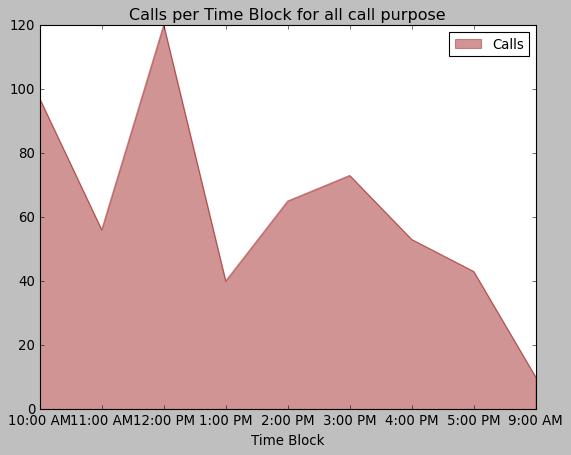

In [53]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
call_times_block = call_times.groupby(["Time Block"]).sum(["Calls"])

# stacked area chart
color = ['brown','grey']
call_times_block.plot(kind = 'area', stacked = False, color = color)
plt.title('Calls per Time Block for all call purpose', color = 'black')
plt.legend(fontsize = 12, labelcolor = 'black')
plt.xlabel('Time Block',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_stacked.png')
plt.show()


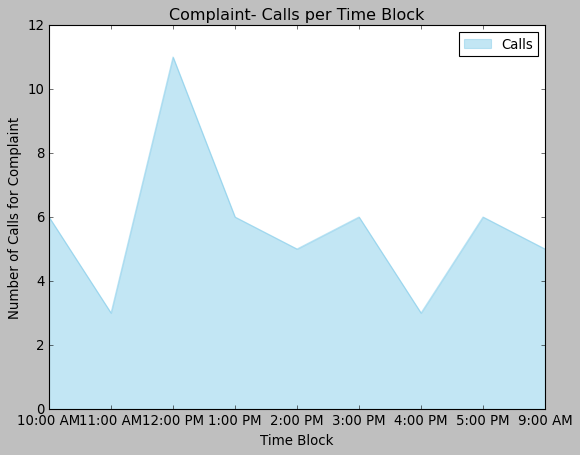

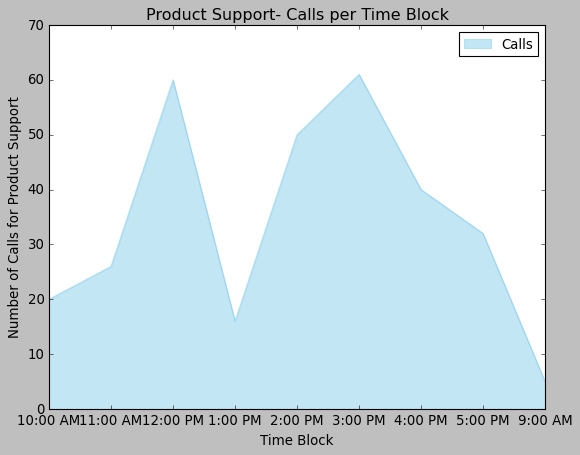

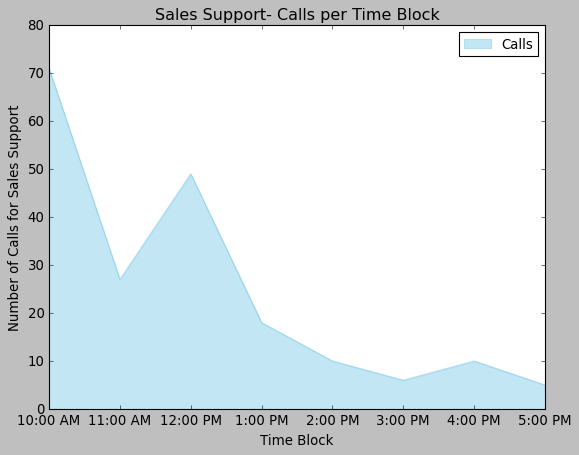

In [56]:
# Use groupby and get_group to select which call purpose to plot:
call_times_purpose = call_times.groupby(["Call Purpose"])

# extract keys from groups
keys = call_times_purpose.groups.keys()
 
for i in keys:    
    call_times_group_df = call_times_purpose.get_group(i)
 # Use groupby to plot based on time blocks:
    call_times_group_df_summary = call_times_group_df.groupby(["Time Block"]).sum(["Calls"])

    # stacked area chart
    color = ['skyblue','blue']
    call_times_group_df_summary.plot(kind = 'area', stacked = False, color = color)
    title = i + '- Calls per Time Block'
    plt.title(title, color = 'black')
    plt.legend(fontsize = 12, labelcolor = 'black')
    plt.xlabel('Time Block',color = 'black')
    ylabel = "Number of Calls for " + i
    plt.ylabel(ylabel,color = 'black')
    plt.xticks(color = 'black')
    plt.yticks(color = 'black')
    plt.savefig('area_stacked.png')
    plt.show()
